In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter
import os

In [8]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [12]:
import tensorflow as tf

# Define image dimensions
img_height = 128
img_width = 128
batch_size = 32

# Absolute path to the directory
directory_path = "C:\\Users\\asus\\Downloads\\Notebook + dataset\\data\\train"

# Loading training dataset
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory_path, 
    seed=42, 
    image_size=(img_height, img_width), 
    batch_size=batch_size
)


Found 791 files belonging to 2 classes.


In [14]:
import tensorflow as tf

# Define image dimensions
img_height = 128
img_width = 128
batch_size = 32

# Absolute path to the data directory
data_directory = "C:\\Users\\asus\\Downloads\\Notebook + dataset\\data"

# Absolute path to the validation directory
validation_directory = data_directory + "\\val"

# Loading validation dataset
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    validation_directory, 
    seed=42, 
    image_size=(img_height, img_width), 
    batch_size=batch_size
)


Found 98 files belonging to 2 classes.


In [16]:
import tensorflow as tf

# Define image dimensions
img_height = 128
img_width = 128
batch_size = 32

# Absolute path to the data directory
data_directory = "C:\\Users\\asus\\Downloads\\Notebook + dataset\\data"

# Absolute path to the testing directory
testing_directory = data_directory + "\\test"

# Loading testing dataset
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    testing_directory, 
    seed=42, 
    image_size=(img_height, img_width), 
    batch_size=batch_size
)

class_names = training_ds.class_names

## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)


Found 100 files belonging to 2 classes.


In [19]:
import tensorflow as tf
from tensorflow.keras import layers

# Defining CNN
MyCnn = tf.keras.models.Sequential(
    [
        layers.BatchNormalization(),
        layers.Conv2D(32, 3, activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 3, activation="relu"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dense(len(class_names), activation="softmax"),
    ]
)

MyCnn.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)


In [20]:
## lets train our CNN
retVal = MyCnn.fit(training_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10


25/25 [==============================] - 12s 396ms/step - loss: 1.3138 - accuracy: 0.5664 - val_loss: 0.6434 - val_accuracy: 0.7143
Epoch 2/10
25/25 [==============================] - 8s 304ms/step - loss: 0.6515 - accuracy: 0.6195 - val_loss: 0.5958 - val_accuracy: 0.6429
Epoch 3/10
25/25 [==============================] - 7s 285ms/step - loss: 0.6244 - accuracy: 0.6397 - val_loss: 0.5501 - val_accuracy: 0.6837
Epoch 4/10
25/25 [==============================] - 7s 295ms/step - loss: 0.5672 - accuracy: 0.6953 - val_loss: 0.5511 - val_accuracy: 0.7041
Epoch 5/10
25/25 [==============================] - 7s 295ms/step - loss: 0.4898 - accuracy: 0.7585 - val_loss: 0.3730 - val_accuracy: 0.8163
Epoch 6/10
25/25 [==============================] - 7s 279ms/step - loss: 0.3862 - accuracy: 0.8319 - val_loss: 0.3060 - val_accuracy: 0.8776
Epoch 7/10
25/25 [==============================] - 7s 289ms/step - loss: 0.3414 - accuracy: 0.8458 - val_loss: 0.3184 - val_accuracy: 0.8673
Epo

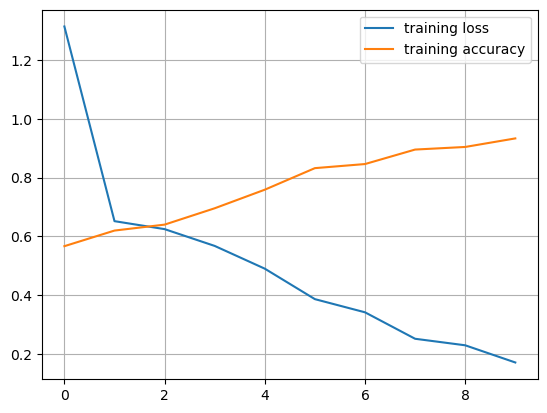

In [21]:
## stats on training data
plt.plot(retVal.history["loss"], label="training loss")
plt.plot(retVal.history["accuracy"], label="training accuracy")
plt.grid(True)
plt.legend()

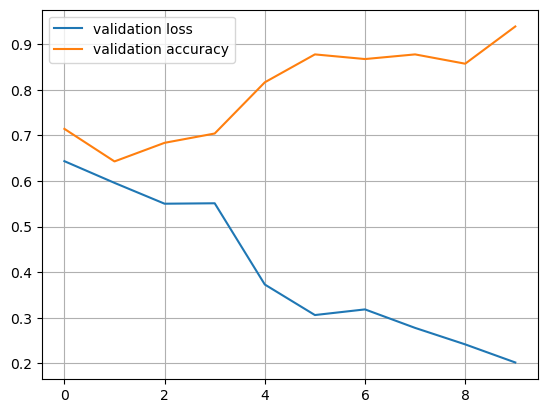

In [22]:
## stats on validation data
plt.plot(retVal.history["val_loss"], label="validation loss")
plt.plot(retVal.history["val_accuracy"], label="validation accuracy")
plt.grid(True)
plt.legend()

1/1 [==============================] - 0s 72ms/step


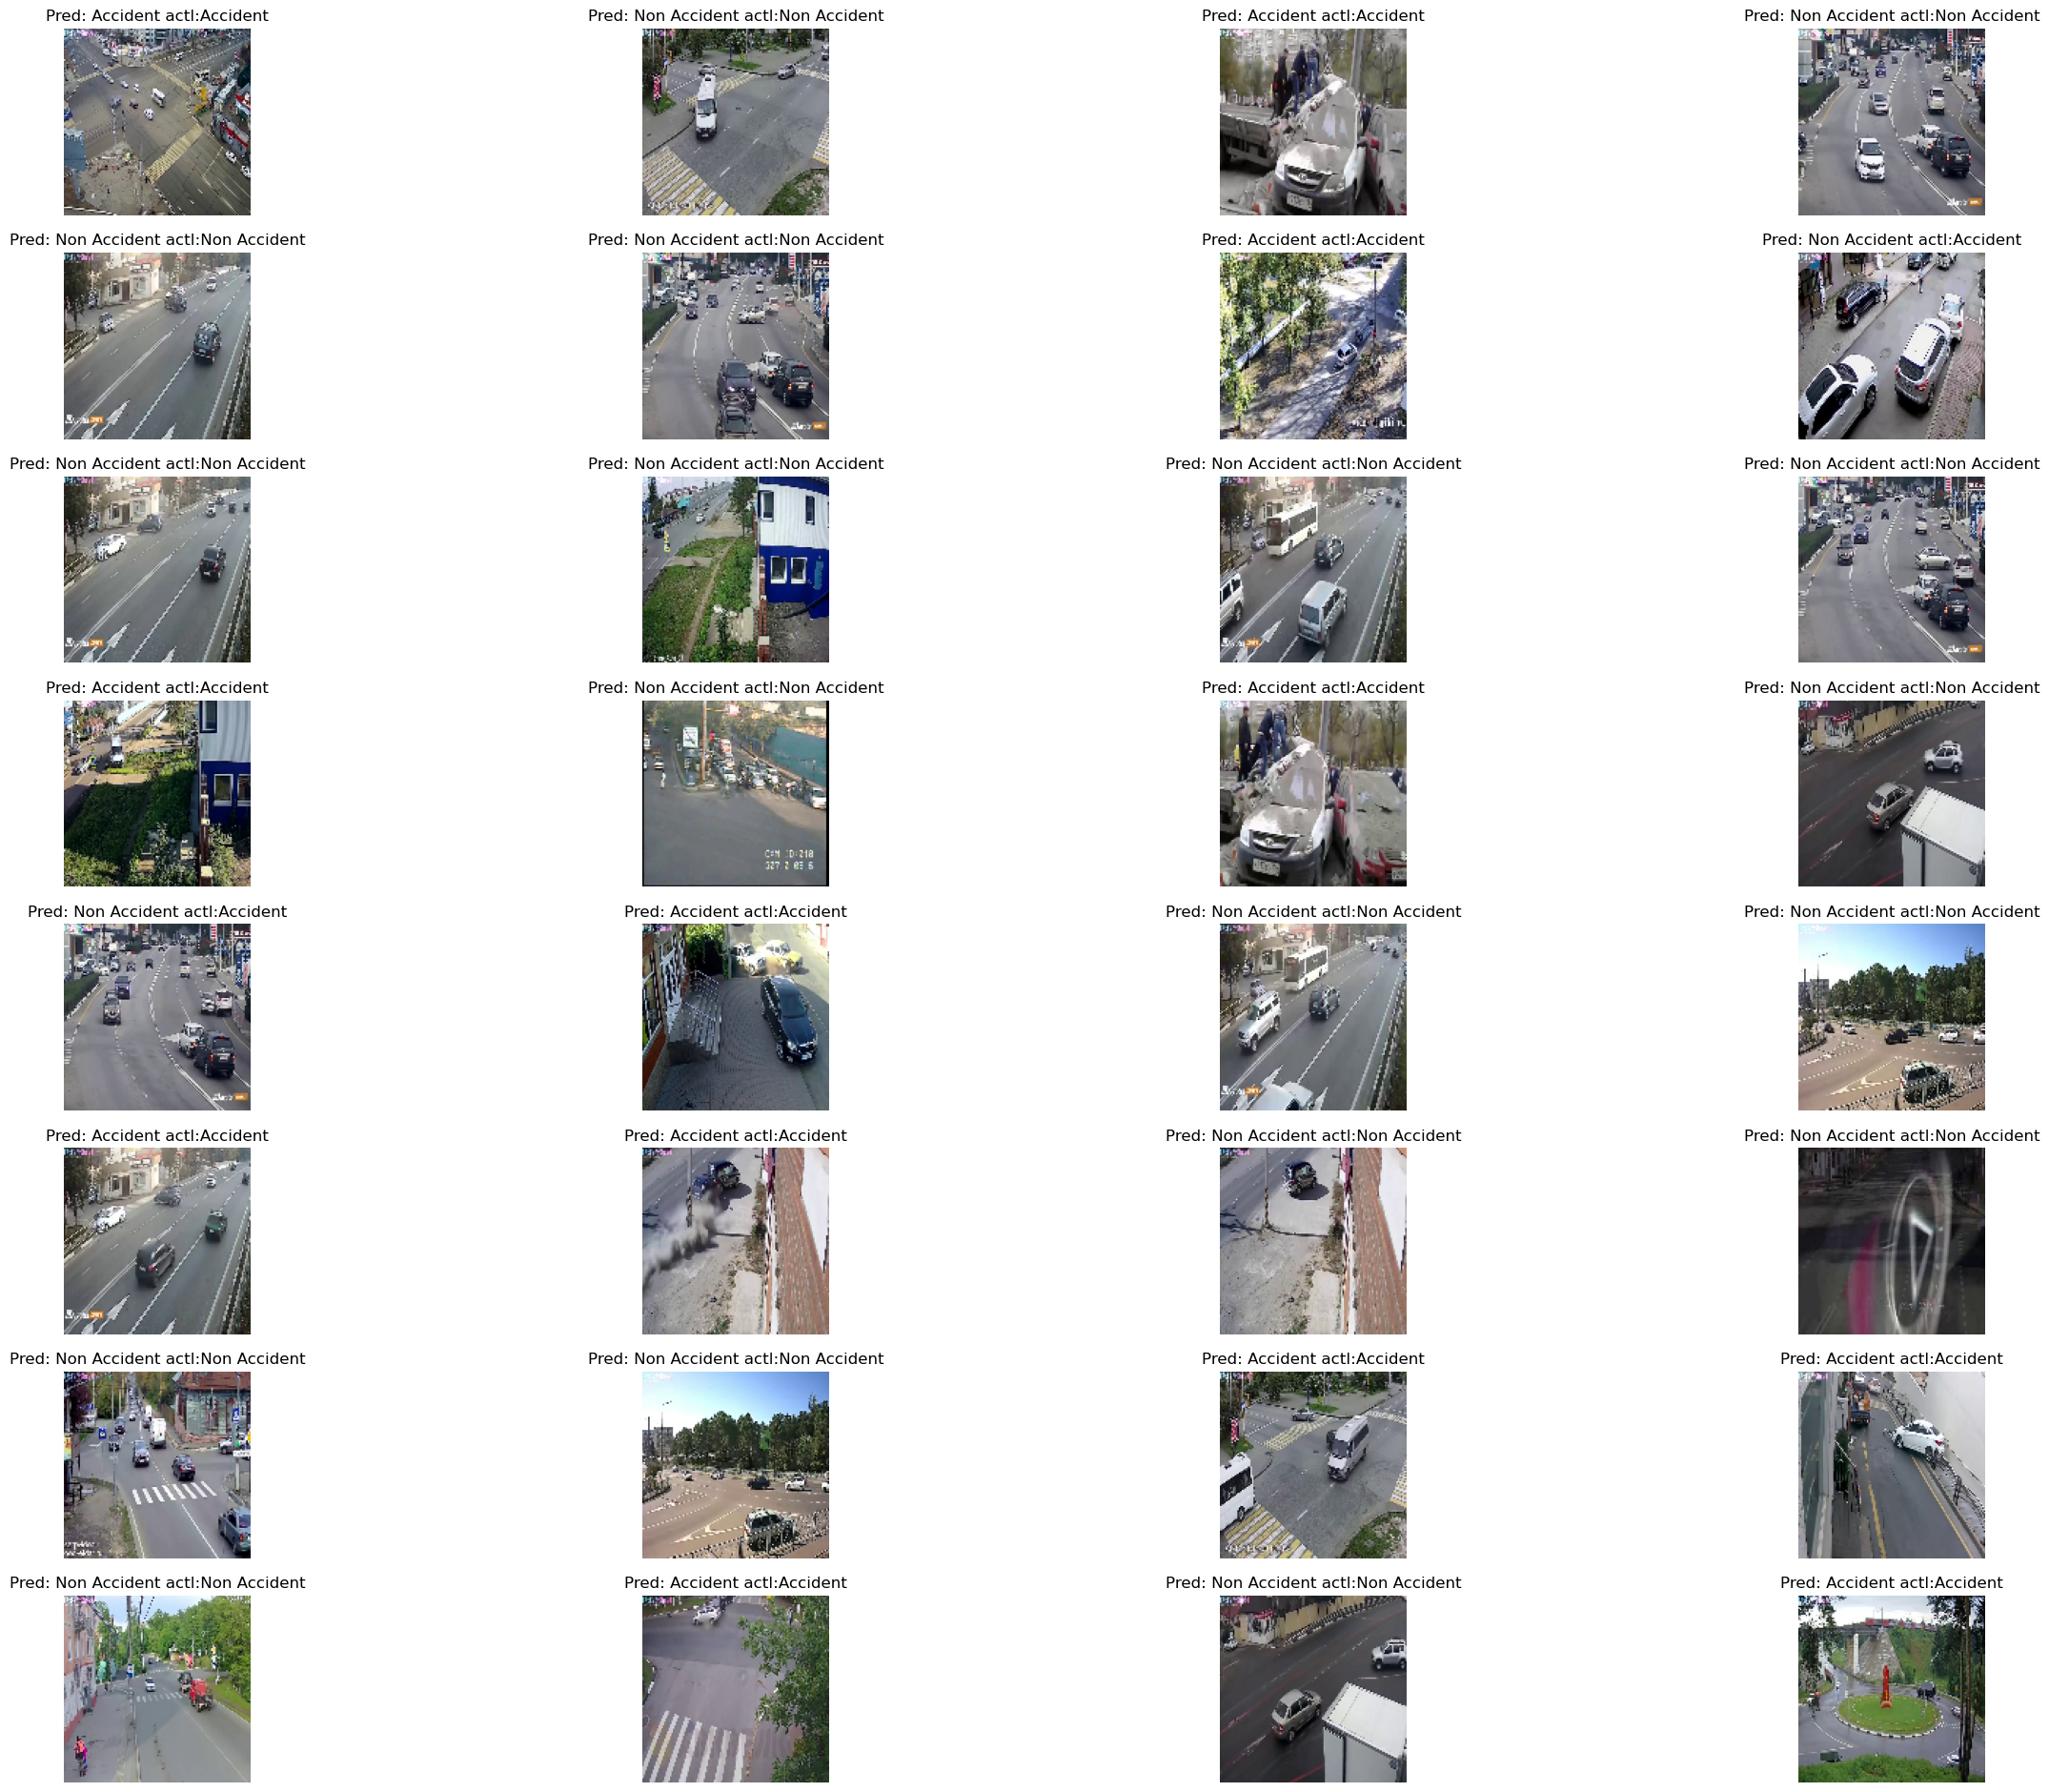

In [24]:
## lets vizualize results on testing data
import numpy as np
import matplotlib.pyplot as plt

AccuracyVector = []
plt.figure(figsize=(30, 30))

# Iterate over the testing dataset
for images, labels in testing_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))

    AccuracyVector = np.array(prdlbl) == labels.numpy()

    # Iterate over the actual number of images in the batch
    for i in range(images.shape[0]):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title("Pred: " + predlabel[i] + " actl:" + class_names[labels[i]])
        plt.axis("off")
        plt.grid(True)

plt.show()


In [55]:
MyCnn.save("Model.h5")

In [56]:
from tensorflow.keras.utils import plot_model

plot_model(MyCnn, to_file="model_plot.png", show_shapes=True, show_layer_names=True)



You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [57]:
!pip install pydot


In [58]:
from tensorflow.keras.utils import plot_model

plot_model(MyCnn, to_file="model_plot.png", show_shapes=True, show_layer_names=True)



You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
